# HR ANALYTICS

#Information about the Data SetThe data was downloaded from Kaggle. The link for the dataset is 
https://www.kaggle.com/liujiaqi/hr-comma-sepcsv

The purpose of the dataset is to predict whether an employee will leave the company or not based on certain attributes.
To implement employee turnover analysis in this project we have used Decision Tree, Random Forest.
We have also measured the accuracy of models that were built by using Machine Learning, and assess them.

Each row represents an employee, each column contains employee attributes:
    
satisfaction_level : This shows the employee satisfaction level 
    
last_evaluation : Time since last evaluation in years
    
number_projects : Number of projects completed while at work
    
average_monthly_hours: Average monthly hours at workplace
    
time_spend_company :Time spent at the company in years
    
Work_accident : Whether the employee had a workplace accident
    
left : Whether the employee left the workplace or not (1 or 0)
    
promotion_last_5years :Whether the employee was promoted in the last five years
    
sales : Department in which they work forsalary : Relative level of salary

# Importing libraries like Numpy, Pandas, Matplotlib, seaborn and scikit learn (sklearn)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot  import imshow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer as ct
from sklearn.preprocessing import StandardScaler as ss
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)


In [4]:
hr = pd.read_csv("HR_comma_sep.csv")

In [5]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
#Get to know data:
hr.shape             

(14999, 10)

In [7]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

# Exploratory Data Analysis

Exploratory Data Analysis (EDA), also known as Data

Exploration is a step in the Data Analysis Process, where a number of techniques are used to better understand he dataset being used.

In [8]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [9]:
hr.dtypes.value_counts() 

int64      6
float64    2
object     2
dtype: int64

In [10]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [11]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Satisfaction level, monthly work hours, workplace accidents and promotion of employees who left and who did not.

In [12]:
hr.groupby('left').mean()

#The average satisfaction level of employees who stayed with the company 
#is higher than that of the employees who left.
#The average monthly work hours of employees who left the company 
#is more than that of the employees who stayed.
#The employees who had workplace accidents are less likely to leave than that of 
#the employee who did not have workplace accidents.
#The employees who were promoted in the last five years are less likely 
#to leave than those who did not get a promotion in the last five years.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# No of employee who left the company 

In [13]:
print("The Number of employee who left the company :",len(hr[hr['left']==1]))
print("The Number of employee who didn't left the company",len(hr[hr['left']==0]))
print("The proportion of employee who left",len(hr[hr['left']==1])/len(hr))

#23 % of employee left the company which is nearby 1/4 it is huge number

The Number of employee who left the company : 3571
The Number of employee who didn't left the company 11428
The proportion of employee who left 0.2380825388359224


# Count Plot drawn to check for imbalance

Negative (0):  11428
Positive  (1):  3571


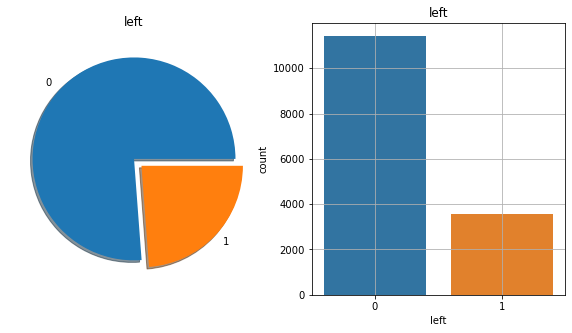

In [14]:
#Count plot
#Outcome count plot
f,ax=plt.subplots(1,2, figsize = (10,5))
hr['left'].value_counts().plot.pie(explode = [0,0.1], ax= ax[0], shadow = True)
ax[0].set_title('left')
ax[0].set_ylabel('')
sns.countplot('left', data=hr, ax=ax[1])
ax[1].set_title('left')
N,P = hr['left'].value_counts()
print('Negative (0): ', N )
print('Positive  (1): ', P )
plt.grid()
plt.show()
#There are 3571 employees left and 11428 employees stayed in our data.

# Bar chart for department employee work for and the frequency of turnover

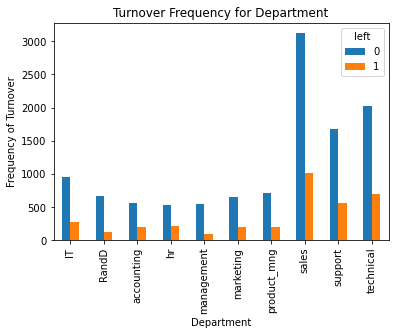

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.sales,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

#It is evident that the frequency of employee turnover depends a great deal 
#on the department they work for. Thus, department can be a good predictor of the outcome variable.

# Bar Plot showing comparison between employees of different departments with attrition based on satisfaction levels

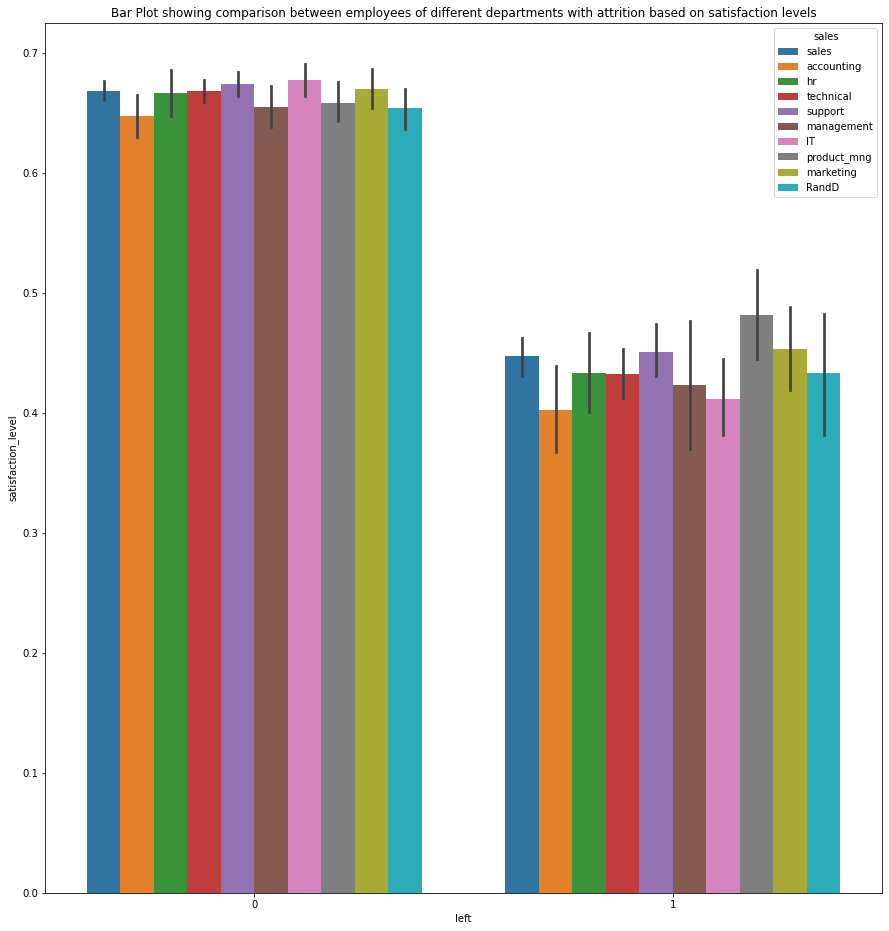

In [16]:
plt.figure(figsize = (15,16))
ax = sns.barplot(x="left", y="satisfaction_level", hue="sales", data=hr)
ax.set_title("Bar Plot showing comparison between employees of different departments with attrition based on satisfaction levels")
plt.show()

#The employees who stayed with the organisation and worked in the IT department had the highest satisfaction level.
#The employees who left the organisation and worked in the accounting department had the lowest satisfaction level.

# Bar chart for employee salary level and the frequency of turnover

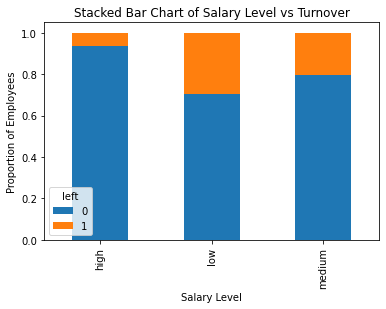

In [17]:
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

#The proportion of the employee turnover depends a great deal on their salary level; 
#hence, salary level can be a good predictor in predicting the outcome.

# Bar chart drawn to understand the salary level according to time spend in the company

In [18]:
tab=pd.crosstab(hr["salary"],hr["time_spend_company"])
tab

time_spend_company,2,3,4,5,6,7,8,10
salary,,,,,,,,
high,303,520,173,66,55,38,18,64
low,1527,3205,1300,799,333,36,60,56
medium,1414,2718,1084,608,330,114,84,94


<function matplotlib.pyplot.show(close=None, block=None)>

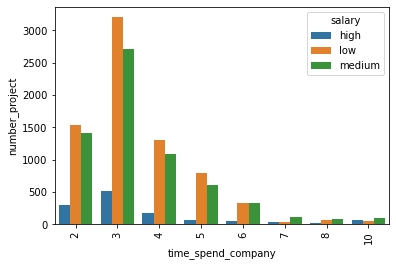

In [19]:
stacked = tab.stack().reset_index().rename(columns={0:'number_project'})
sns.barplot(x=stacked.time_spend_company, y=stacked.number_project, hue=stacked.salary)
plt.xticks(rotation=90)
plt.show
# The employees who had spend 3 years in the company and had the lowest salary, did the maximum number of projects 
#compared to the other employees who had spend 4-10 years.

# Analysing relationship between variables

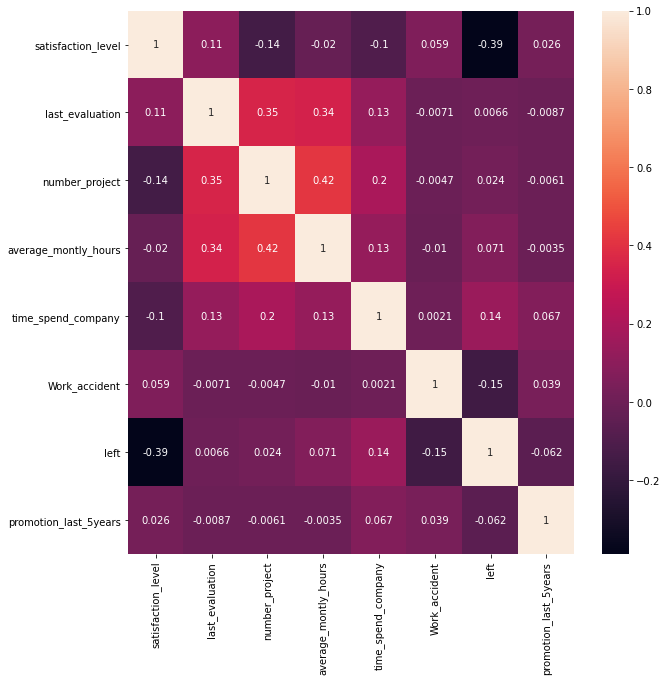

In [20]:
#get correlation of each feature in dataset
corrmat = hr.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
#plot heat map
g= sns.heatmap(hr[top_corr_features].corr(),annot=True)
#The correlation values are very less for the various features 
#the ones that are direclty correlated have some significance i.e., time spend in the company

# Decision Tree

In [21]:
hr = hr.sample(frac = 1)
hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
13123,0.52,0.57,3,270,3,0,0,0,RandD,low
3264,0.59,0.79,4,209,2,0,0,0,technical,medium
9845,0.69,0.94,5,259,2,0,0,0,IT,medium
10799,0.78,0.59,5,236,3,0,0,0,technical,high
2732,0.56,0.68,5,203,2,0,0,0,IT,low


In [22]:
cat_vars=['sales','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [23]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'sales_IT', 'sales_RandD',
       'sales_accounting', 'sales_hr', 'sales_management',
       'sales_marketing', 'sales_product_mng', 'sales_sales',
       'sales_support', 'sales_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

In [24]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'sales_RandD', 'sales_hr', 'sales_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']

In [25]:
X_train,X_test, y_train, y_test = train_test_split(X,y , test_size = 0.25 )

In [26]:
X_train.shape   

(11249, 10)

In [27]:
X_test.shape        

(3750, 10)

In [28]:
y_train.shape   

(11249,)

In [29]:
y_test.shape 

(3750,)

In [30]:
clf = dt()           
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
out = clf.predict(X_test)
out

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
np.sum(out == y_test)/y_test.values.size*100

97.01333333333334

In [33]:
d=clf.predict(X_test)
pred_hr=pd.DataFrame(d)
pred_hr

,0
0,0
1,1
2,0
3,0
4,1
...,...
3745,0
3746,0
3747,0
3748,0


<AxesSubplot:>

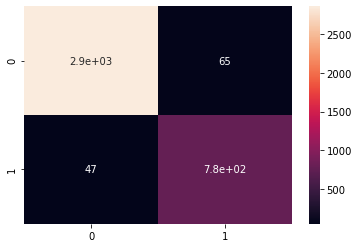

In [34]:
#confusion matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, pred_hr)
cm
sns.heatmap(confusion_matrix(y_test,pred_hr),annot = True)

In [35]:
#making the confusion matrix of dt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, pred_hr)
print('TN – True Negative {}'.format(cm[0,0]))
print('FP – False Positive {}'.format(cm[0,1]))
print('FN – False Negative {}'.format(cm[1,0]))
print('TP – True Positive {}'.format(cm[1,1]))

TN – True Negative 2863
FP – False Positive 65
FN – False Negative 47
TP – True Positive 775


In [36]:
print('Classification Report of Decision Tree : \n', classification_report(y_test, pred_hr, digits = 4))

Classification Report of Decision Tree : 
               precision    recall  f1-score   support

           0     0.9838    0.9778    0.9808      2928
           1     0.9226    0.9428    0.9326       822

    accuracy                         0.9701      3750
   macro avg     0.9532    0.9603    0.9567      3750
weighted avg     0.9704    0.9701    0.9702      3750



In [37]:
auc = round(roc_auc_score(y_test, pred_hr)*100,2)
print('roc_auc_score of DT :' , auc)

roc_auc_score of DT : 96.03


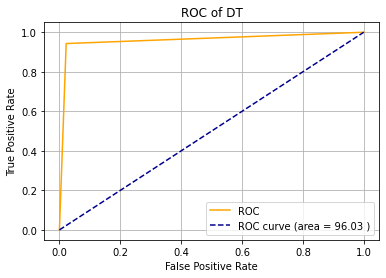

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, pred_hr)
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color='darkblue' , linestyle='--' , label = 'ROC curve (area = %0.2f )' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of DT')
plt.legend()
plt.grid()
plt.show()

In [39]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_n = ['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'sales_RandD', 'sales_hr', 'sales_management', 'salary_high', 'salary_low']
X_train_n = scaler.fit_transform(hr[features_n])
data = export_graphviz(DecisionTreeClassifier().fit(X, y), out_file=None, 
                       feature_names = features_n,
                       class_names = ['Not left (0)', 'Left (1)'], 
                       filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(data)
graph

ModuleNotFoundError: No module named 'graphviz'

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.982


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2928
           1       0.95      0.96      0.96       822

    accuracy                           0.98      3750
   macro avg       0.97      0.97      0.97      3750
weighted avg       0.98      0.98      0.98      3750



In [43]:
a=rf.predict(X_test)
pred_hr_rf=pd.DataFrame(a)
pred_hr_rf

,0
0,0
1,1
2,0
3,0
4,1
...,...
3745,0
3746,0
3747,0
3748,0


<AxesSubplot:>

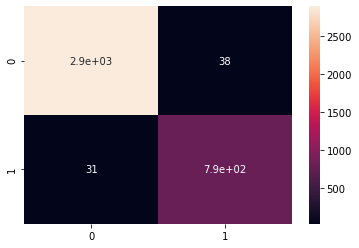

In [44]:
#confusion matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, pred_hr_rf)
cm
sns.heatmap(confusion_matrix(y_test,pred_hr_rf),annot = True)

In [45]:
#making the confusion matrix of dt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, pred_hr_rf)
print('TN – True Negative {}'.format(cm[0,0]))
print('FP – False Positive {}'.format(cm[0,1]))
print('FN – False Negative {}'.format(cm[1,0]))
print('TP – True Positive {}'.format(cm[1,1]))

TN – True Negative 2890
FP – False Positive 38
FN – False Negative 31
TP – True Positive 791


In [46]:
print('Classification Report of Random Forest : \n', classification_report(y_test, pred_hr_rf, digits = 4))

Classification Report of Random Forest : 
               precision    recall  f1-score   support

           0     0.9894    0.9870    0.9882      2928
           1     0.9542    0.9623    0.9582       822

    accuracy                         0.9816      3750
   macro avg     0.9718    0.9747    0.9732      3750
weighted avg     0.9817    0.9816    0.9816      3750



In [47]:
auc = round(roc_auc_score(y_test, pred_hr_rf)*100,2)
print('roc_auc_score of RF :' , auc)

roc_auc_score of RF : 97.47


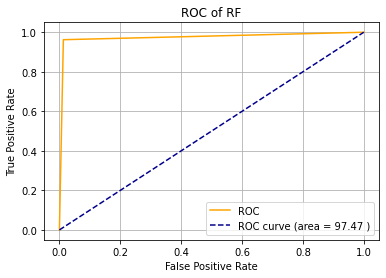

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, pred_hr_rf)
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color='darkblue' , linestyle='--' , label = 'ROC curve (area = %0.2f )' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of RF')
plt.legend()
plt.grid()
plt.show()